# 0526 수업 정리
- K 최근접 이웃 분류 실습 1차시

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

print("Hello World")

Hello World


In [2]:
fish_all = pd.read_csv("Fish.csv")

fish_all

Species  Weight  Length   Height   Width
0     Bream   242.0    25.4  11.5200  4.0200
1     Bream   290.0    26.3  12.4800  4.3056
2     Bream   340.0    26.5  12.3778  4.6961
3     Bream   363.0    29.0  12.7300  4.4555
4     Bream   430.0    29.0  12.4440  5.1340
..      ...     ...     ...      ...     ...
154   Smelt    12.2    12.2   2.0904  1.3936
155   Smelt    13.4    12.4   2.4300  1.2690
156   Smelt    12.2    13.0   2.2770  1.2558
157   Smelt    19.7    14.3   2.8728  2.0672
158   Smelt    19.9    15.0   2.9322  1.8792

[159 rows x 5 columns]

In [3]:
fish_bream = fish_all[fish_all["Species"] == "Bream"]

fish_bream

Species  Weight  Length   Height   Width
0    Bream   242.0    25.4  11.5200  4.0200
1    Bream   290.0    26.3  12.4800  4.3056
2    Bream   340.0    26.5  12.3778  4.6961
3    Bream   363.0    29.0  12.7300  4.4555
4    Bream   430.0    29.0  12.4440  5.1340
5    Bream   450.0    29.7  13.6024  4.9274
6    Bream   500.0    29.7  14.1795  5.2785
7    Bream   390.0    30.0  12.6700  4.6900
8    Bream   450.0    30.0  14.0049  4.8438
9    Bream   500.0    30.7  14.2266  4.9594
10   Bream   475.0    31.0  14.2628  5.1042
11   Bream   500.0    31.0  14.3714  4.8146
12   Bream   500.0    31.5  13.7592  4.3680
13   Bream   340.0    32.0  13.9129  5.0728
14   Bream   600.0    32.0  14.9544  5.1708
15   Bream   600.0    32.0  15.4380  5.5800
16   Bream   700.0    33.0  14.8604  5.2854
17   Bream   700.0    33.0  14.9380  5.1975
18   Bream   610.0    33.5  15.6330  5.1338
19   Bream   650.0    33.5  14.4738  5.7276
20   Bream   575.0    34.0  15.1285  5.5695
21   Bream   685.0    34.0  15.9936  5.3704
22   Bream   620.0    34.5  15.5227  5.2801
23   Bream   680.0    35.0  15.4686  6.1306
24   Bream   700.0    35.0  16.2405  5.5890
25   Bream   725.0    35.0  16.3600  6.0532
26   Bream   720.0    35.0  16.3618  6.0900
27   Bream   714.0    36.0  16.5170  5.8515
28   Bream   850.0    36.0  16.8896  6.1984
29   Bream  1000.0    37.0  18.9570  6.6030
30   Bream   920.0    38.5  18.0369  6.3063
31   Bream   955.0    38.5  18.0840  6.2920
32   Bream   925.0    39.5  18.7542  6.7497
33   Bream   975.0    41.0  18.6354  6.7473
34   Bream   950.0    41.0  17.6235  6.3705

In [4]:
bream_length = fish_bream["Length"]
print(bream_length[:5])

bream_weight = fish_bream["Weight"]
print(bream_weight[:5])

0    25.4
1    26.3
2    26.5
3    29.0
4    29.0
Name: Length, dtype: float64
0    242.0
1    290.0
2    340.0
3    363.0
4    430.0
Name: Weight, dtype: float64


In [5]:
fish_smelt = fish_all[fish_all["Species"] == "Smelt"]

fish_smelt

Species  Weight  Length  Height   Width
145   Smelt     6.7     9.8  1.7388  1.0476
146   Smelt     7.5    10.5  1.9720  1.1600
147   Smelt     7.0    10.6  1.7284  1.1484
148   Smelt     9.7    11.0  2.1960  1.3800
149   Smelt     9.8    11.2  2.0832  1.2772
150   Smelt     8.7    11.3  1.9782  1.2852
151   Smelt    10.0    11.8  2.2139  1.2838
152   Smelt     9.9    11.8  2.2139  1.1659
153   Smelt     9.8    12.0  2.2044  1.1484
154   Smelt    12.2    12.2  2.0904  1.3936
155   Smelt    13.4    12.4  2.4300  1.2690
156   Smelt    12.2    13.0  2.2770  1.2558
157   Smelt    19.7    14.3  2.8728  2.0672
158   Smelt    19.9    15.0  2.9322  1.8792

In [6]:
smelt_length = fish_smelt["Length"]
print(smelt_length[:5])

smelt_weight = fish_smelt["Weight"]
print(smelt_weight[:5])

145     9.8
146    10.5
147    10.6
148    11.0
149    11.2
Name: Length, dtype: float64
145    6.7
146    7.5
147    7.0
148    9.7
149    9.8
Name: Weight, dtype: float64


In [7]:
length_bream = bream_length.to_numpy().reshape(-1, 1)
length_smelt = smelt_length.to_numpy().reshape(-1, 1)

print(length_bream.shape)
print(length_smelt.shape)

length_bream_smelt = np.concatenate([length_bream, length_smelt], axis=0)
# 도미와 빙어의 길의 배열을 합쳐준다.
print(length_bream_smelt.shape)

length_bream_smelt

(35, 1)
(14, 1)
(49, 1)


array([[25.4],
       [26.3],
       [26.5],
       [29. ],
       [29. ],
       [29.7],
       [29.7],
       [30. ],
       [30. ],
       [30.7],
       [31. ],
       [31. ],
       [31.5],
       [32. ],
       [32. ],
       [32. ],
       [33. ],
       [33. ],
       [33.5],
       [33.5],
       [34. ],
       [34. ],
       [34.5],
       [35. ],
       [35. ],
       [35. ],
       [35. ],
       [36. ],
       [36. ],
       [37. ],
       [38.5],
       [38.5],
       [39.5],
       [41. ],
       [41. ],
       [ 9.8],
       [10.5],
       [10.6],
       [11. ],
       [11.2],
       [11.3],
       [11.8],
       [11.8],
       [12. ],
       [12.2],
       [12.4],
       [13. ],
       [14.3],
       [15. ]])

In [8]:
weight_bream = bream_weight.to_numpy().reshape(-1, 1)
print(weight_bream.shape)

weight_smelt = smelt_weight.to_numpy().reshape(-1, 1)
print(weight_smelt.shape)

weight_bream_smelt = np.concatenate([weight_bream, weight_smelt], axis=0)
print(weight_bream_smelt.shape)

weight_bream_smelt

(35, 1)
(14, 1)
(49, 1)


array([[ 242. ],
       [ 290. ],
       [ 340. ],
       [ 363. ],
       [ 430. ],
       [ 450. ],
       [ 500. ],
       [ 390. ],
       [ 450. ],
       [ 500. ],
       [ 475. ],
       [ 500. ],
       [ 500. ],
       [ 340. ],
       [ 600. ],
       [ 600. ],
       [ 700. ],
       [ 700. ],
       [ 610. ],
       [ 650. ],
       [ 575. ],
       [ 685. ],
       [ 620. ],
       [ 680. ],
       [ 700. ],
       [ 725. ],
       [ 720. ],
       [ 714. ],
       [ 850. ],
       [1000. ],
       [ 920. ],
       [ 955. ],
       [ 925. ],
       [ 975. ],
       [ 950. ],
       [   6.7],
       [   7.5],
       [   7. ],
       [   9.7],
       [   9.8],
       [   8.7],
       [  10. ],
       [   9.9],
       [   9.8],
       [  12.2],
       [  13.4],
       [  12.2],
       [  19.7],
       [  19.9]])

In [9]:
data_inpit = np.concatenate([length_bream_smelt, weight_bream_smelt], axis=1)
print(data_inpit.shape)
pd.DataFrame(data_inpit)

(49, 2)


0       1
0   25.4   242.0
1   26.3   290.0
2   26.5   340.0
3   29.0   363.0
4   29.0   430.0
5   29.7   450.0
6   29.7   500.0
7   30.0   390.0
8   30.0   450.0
9   30.7   500.0
10  31.0   475.0
11  31.0   500.0
12  31.5   500.0
13  32.0   340.0
14  32.0   600.0
15  32.0   600.0
16  33.0   700.0
17  33.0   700.0
18  33.5   610.0
19  33.5   650.0
20  34.0   575.0
21  34.0   685.0
22  34.5   620.0
23  35.0   680.0
24  35.0   700.0
25  35.0   725.0
26  35.0   720.0
27  36.0   714.0
28  36.0   850.0
29  37.0  1000.0
30  38.5   920.0
31  38.5   955.0
32  39.5   925.0
33  41.0   975.0
34  41.0   950.0
35   9.8     6.7
36  10.5     7.5
37  10.6     7.0
38  11.0     9.7
39  11.2     9.8
40  11.3     8.7
41  11.8    10.0
42  11.8     9.9
43  12.0     9.8
44  12.2    12.2
45  12.4    13.4
46  13.0    12.2
47  14.3    19.7
48  15.0    19.9

In [10]:
target_bream = np.ones(35)
# 도미를 1로 지정

target_smelt = np.zeros(14)
# 빙어를 0으로 지정

data_target = np.concatenate([target_bream, target_smelt], axis=0)
print(data_target.shape)
data_target

(49,)


array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [11]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(data_inpit, data_target, random_state=42, stratify=data_target)
# 무작위로 데이터를 섞으면 하나의 클래스에 몰중 될 수 있다. => 샘플링 편향 발생
# 이 문제를 해결하기 위해서 stratify에 종속 변수를 넣어준다.

print(train_input.shape, test_input.shape, train_target.shape, test_target.shape)

print(train_target)
print(test_target)

(36, 2) (13, 2) (36,) (13,)
[1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1.
 0. 1. 0. 1. 1. 1. 0. 1. 1. 0. 1. 1.]
[0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1.]


In [12]:
pd.DataFrame(train_input)

0       1
0   29.7   500.0
1   12.2    12.2
2   33.0   700.0
3   11.3     8.7
4   39.5   925.0
5   29.0   430.0
6   36.0   714.0
7   36.0   850.0
8   31.0   475.0
9   35.0   720.0
10  37.0  1000.0
11  11.2     9.8
12  34.5   620.0
13  12.0     9.8
14  29.0   363.0
15  33.0   700.0
16  30.7   500.0
17  38.5   955.0
18  33.5   650.0
19  14.3    19.7
20  31.5   500.0
21  25.4   242.0
22   9.8     6.7
23  32.0   600.0
24  10.5     7.5
25  33.5   610.0
26  10.6     7.0
27  35.0   700.0
28  32.0   600.0
29  35.0   725.0
30  13.0    12.2
31  30.0   450.0
32  32.0   340.0
33  15.0    19.9
34  30.0   390.0
35  41.0   975.0

In [13]:
from sklearn.neighbors import KNeighborsClassifier
# k 최근접 이웃 
model_knc = KNeighborsClassifier()
model_knc.fit(train_input, train_target)

KNeighborsClassifier()

In [14]:
print(model_knc.predict([[25, 400]]))

[1.]


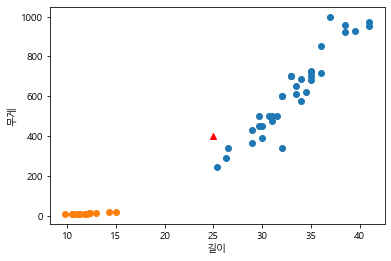

In [15]:
plt.rc("font", family="Malgun Gothic")

plt.scatter(length_bream, weight_bream)
plt.scatter(length_smelt, weight_smelt)

plt.scatter(25, 400, marker="^", c="red")

plt.xlabel("길이")
plt.ylabel("무게")

plt.show()

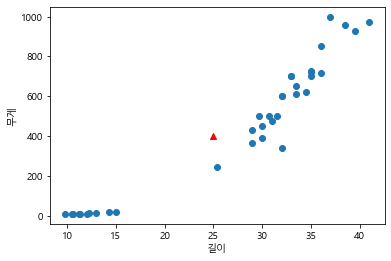

In [16]:
plt.rc("font", family="Malgun Gothic")

plt.scatter(train_input[:, 0], train_input[:, 1])

plt.scatter(25, 400, marker="^", c="red")

plt.xlabel("길이")
plt.ylabel("무게")

plt.show()

In [17]:
score_knc = model_knc.score(test_input, test_target)
print(score_knc)

1.0


In [18]:
model_neighbors = KNeighborsClassifier()
model_neighbors.fit(train_input, train_target)

for i in range(1, 49):
    model_neighbors.n_neighbors = i
    score_neighbors = model_neighbors.score(test_input, test_target)
    
    if(score_neighbors < 1.0):
        print(f"모델의 정확도가 100%가 개지는 첫 k값 : {i}")
        print(f"해당 k값의 정확도 : {score_neighbors}")
        
        break

모델의 정확도가 100%가 개지는 첫 k값 : 20
해당 k값의 정확도 : 0.9230769230769231


# 0602 수업 정리
- 데이터 스케일링을 언제 해야 하는지
- 데이터 스케일링 하는 법

In [19]:
print(model_knc.predict([[25, 150]]))
# 해당 물고기는 도미인데 빙어로 분류 한다

[0.]


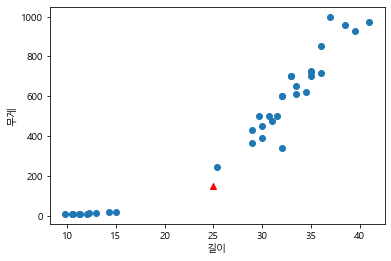

In [20]:
plt.scatter(train_input[:, 0], train_input[:, 1])

plt.scatter(25, 150, marker="^", c="red")

plt.xlabel("길이")
plt.ylabel("무게")

plt.show()

In [21]:
indexs = model_knc.kneighbors([[25, 150]], return_distance=False)
#kneighbors 함수는 해당 데이터가 참고한 이웃 데이터의 인덱스를 반환한다,.
# return_distance를 flase로 주면 해당 데이터와의 거리까지 반환 한다.

print(indexs)

print(train_target[indexs])
# 그래프 상으로는 1번 데이터에 더 가까운데, 참고한 데이터는 0번데이터를 더 많이 참고한다.

[[21 33 19 30  1]]
[[1. 0. 0. 0. 0.]]


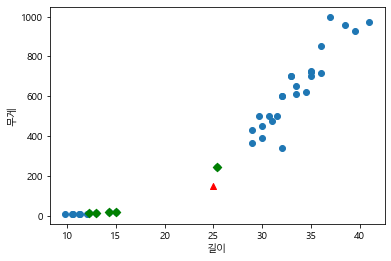

In [22]:
plt.scatter(train_input[:, 0], train_input[:, 1])

plt.scatter(25, 150, marker="^", c="red")

plt.scatter(train_input[indexs, 0], train_input[indexs, 1], marker="D", c="green")

plt.xlabel("길이")
plt.ylabel("무게")

plt.show()

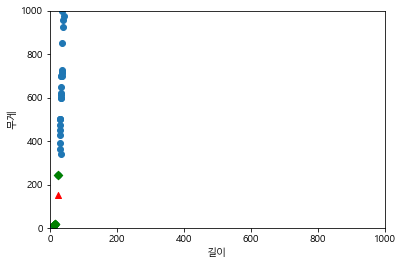

In [23]:
plt.scatter(train_input[:, 0], train_input[:, 1])

plt.scatter(25, 150, marker="^", c="red")

plt.scatter(train_input[indexs, 0], train_input[indexs, 1], marker="D", c="green")

plt.xlim((0, 1000))
plt.ylim((0, 1000))
# 각 축의 데이터 범위를 변경

plt.xlabel("길이")
plt.ylabel("무게")

plt.show()


# 데이터의 스케일 차이가 너무 많이 난다.
# 길이의 차이가 무게에 비해 너무 작아서 오차가 발생 했다.

# 데이터가 비슷한 수준의 영향역을 가질 수 있도록 스케일링 작업을 해준다.
# 여러 스케일링 방법 중에서 표준화를 사용 한다.

# 표준화는 값들의 평균, 표준 편차가 필요 하다.

In [24]:
mean = np.mean(train_input, axis=0)
# 지정한 축 방향으로 평균을 구한다.

mean

array([ 27.29722222, 454.09722222])

In [25]:
std = np.std(train_input, axis=0)
# 지정한 축 방향으로 표준 편차

std

array([  9.98244253, 323.29893931])

In [26]:
train_scaled = (train_input - mean) / std
# 표준화 공식

train_scaled

array([[ 0.24070039,  0.14198246],
       [-1.51237757, -1.36683783],
       [ 0.5712808 ,  0.76060496],
       [-1.60253587, -1.37766373],
       [ 1.22242404,  1.45655528],
       [ 0.17057727, -0.07453542],
       [ 0.87180845,  0.80390854],
       [ 0.87180845,  1.22457184],
       [ 0.37092904,  0.06465464],
       [ 0.77163257,  0.82246721],
       [ 0.97198434,  1.68853872],
       [-1.61255346, -1.3742613 ],
       [ 0.72154463,  0.51315596],
       [-1.53241275, -1.3742613 ],
       [ 0.17057727, -0.28177396],
       [ 0.5712808 ,  0.76060496],
       [ 0.34087627,  0.14198246],
       [ 1.12224816,  1.54934866],
       [ 0.62136874,  0.60594934],
       [-1.30200822, -1.34363949],
       [ 0.42101698,  0.14198246],
       [-0.19005591, -0.65604058],
       [-1.75279969, -1.38384995],
       [ 0.47110492,  0.45129371],
       [-1.68267658, -1.38137546],
       [ 0.62136874,  0.48222484],
       [-1.67265899, -1.38292202],
       [ 0.77163257,  0.76060496],
       [ 0.47110492,

In [27]:
from sklearn.preprocessing import StandardScaler #표준화를 하는 모듈


scaler_std = StandardScaler()
scaler_std.fit(train_input) #훈련 진행, 평균과 표준편차를 계산 한다.

train_scaled = scaler_std.transform(train_input) # 표준화 스케일링 진행

train_scaled

array([[ 0.24070039,  0.14198246],
       [-1.51237757, -1.36683783],
       [ 0.5712808 ,  0.76060496],
       [-1.60253587, -1.37766373],
       [ 1.22242404,  1.45655528],
       [ 0.17057727, -0.07453542],
       [ 0.87180845,  0.80390854],
       [ 0.87180845,  1.22457184],
       [ 0.37092904,  0.06465464],
       [ 0.77163257,  0.82246721],
       [ 0.97198434,  1.68853872],
       [-1.61255346, -1.3742613 ],
       [ 0.72154463,  0.51315596],
       [-1.53241275, -1.3742613 ],
       [ 0.17057727, -0.28177396],
       [ 0.5712808 ,  0.76060496],
       [ 0.34087627,  0.14198246],
       [ 1.12224816,  1.54934866],
       [ 0.62136874,  0.60594934],
       [-1.30200822, -1.34363949],
       [ 0.42101698,  0.14198246],
       [-0.19005591, -0.65604058],
       [-1.75279969, -1.38384995],
       [ 0.47110492,  0.45129371],
       [-1.68267658, -1.38137546],
       [ 0.62136874,  0.48222484],
       [-1.67265899, -1.38292202],
       [ 0.77163257,  0.76060496],
       [ 0.47110492,

In [28]:
model_knc_scaled = KNeighborsClassifier()

model_knc_scaled.fit(train_scaled, train_target)

KNeighborsClassifier()

In [29]:
new_fish_scaled = scaler_std.transform([[25, 150]])
# 학습 시킬 데이터 또한 스케일을 진행해줘야 한다.

new_fish_scaled

array([[-0.23012627, -0.94060693]])

In [30]:
indexs_scaled = model_knc_scaled.kneighbors(new_fish_scaled, return_distance=False)
        
print(indexs_scaled)
print(train_input[indexs_scaled])

[[21 14 34 32  5]]
[[[ 25.4 242. ]
  [ 29.  363. ]
  [ 30.  390. ]
  [ 32.  340. ]
  [ 29.  430. ]]]


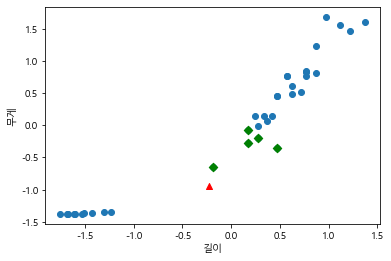

In [31]:
plt.scatter(train_scaled[:, 0], train_scaled[:, 1])

plt.scatter(new_fish_scaled[0][0], new_fish_scaled[0][1], marker="^", c="red")

plt.scatter(train_scaled[indexs_scaled, 0], train_scaled[indexs_scaled, 1], marker="D", c="green")

plt.xlabel("길이")
plt.ylabel("무게")

plt.rcParams["axes.unicode_minus"] = False

plt.show()


In [32]:
model_knc_scaled.predict(new_fish_scaled)

array([1.])